In [1]:
import numpy as np
import utils
import clusterUtils
import tagStruct
import importlib
import matplotlib.pyplot as plt

In [2]:
tags = utils.loadDatasets(threshold = 30 , truncationLength = 200)
x_train = tags[0].__raw__.iloc[:, tags[0].findIndex("depth")]

data/5111027PAM110P0574TS.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5111033PAM110P0587-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5111034PAM110P0588-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5111045PAM110P0590-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5112030PAM110P0416-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5112039PAM111P0762-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time
data/5112041PAM111P0763-Archive.csv
['time', 'depth', 'temperature', 'light level']
found:  time


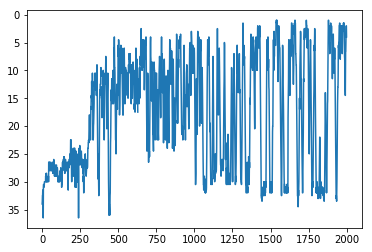

In [3]:
x_train = np.asarray(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], 1))
x_train = x_train.astype(float)
plt.plot(x_train[:2000])
plt.gca().invert_yaxis()
plt.show()

In [4]:
from __future__ import division
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

from pybasicbayes.util.text import progprint_xrange
from pylds.models import DefaultLDS
npr.seed(0)

# Set parameters
D_obs = 1
D_latent = 2
D_input = 0
T = 2000


myData = x_train[2000:4000]
myData += .0001


# Simulate from one LDS
truemodel = DefaultLDS(D_obs, D_latent, D_input)
inputs = np.random.randn(T, D_input)
data, stateseq = truemodel.generate(T, inputs=inputs)

# Fit with another LDS
model = DefaultLDS(D_obs, D_latent, D_input)
inputs = np.random.randn(T, D_input)
model.add_data(myData, inputs=inputs)

# Initialize with a few iterations of Gibbs
for _ in progprint_xrange(10):
    model.resample_model()

# Run EM
def update(model):
    model.EM_step()
    return model.log_likelihood()

lls = [update(model) for _ in progprint_xrange(50)]

# Plot the log likelihoods
plt.figure()
plt.plot(lls)
plt.xlabel('iteration')
plt.ylabel('training likelihood')

# Predict forward in time
T_given = 1800
T_predict = 200
given_data= data[:T_given]
given_inputs = inputs[:T_given]

..........
   0.01sec avg, 0.08 total

called
Im in the beast of info_E_step: smooth_sigmas:  [[[ 0.97986055 -0.02952144]
  [-0.02952144  0.89247772]]

 [[ 0.51427774 -0.03647444]
  [-0.03647444  0.4120925 ]]

 [[ 0.43589013 -0.09638754]
  [-0.09638754  0.35381508]]

 ...

 [[ 0.4258707  -0.09989129]
  [-0.09989129  0.35202851]]

 [[ 0.42605311 -0.10005887]
  [-0.10005887  0.35218245]]

 [[ 0.42742527 -0.10226991]
  [-0.10226991  0.35574523]]] ext_xtp1:  [[[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 ...

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]]
what do we have:  [array([[nan, nan],
       [nan, nan]])
 array([[nan, nan],
       [nan, nan]])
 array([[nan, nan],
       [nan, nan]]) 1999]
data:  None
stats:  [array([[nan, nan],
       [nan, nan]])
 array([[nan, nan],
       [nan, nan]])
 array([[nan, nan],
       [nan, nan]]) 1999]
stats:  [array([[nan, nan],
       [nan, nan]])
 array([[nan, nan],
       [nan, nan]])
 

AssertionError: 

In [ ]:
preds = \
    model.sample_predictions(
        given_data, inputs=given_inputs,
        Tpred=T_predict,
        inputs_pred=inputs[T_given:T_given + T_predict])

# Plot the predictions
plt.figure()
plt.plot(np.arange(T), data, 'b-', label="true")
plt.plot(T_given + np.arange(T_predict), preds, 'r--', label="prediction")
ylim = plt.ylim()
plt.plot([T_given, T_given], ylim, '-k')
plt.xlabel('time index')
plt.xlim(max(0, T_given - 200), T)
plt.ylabel('prediction')
plt.ylim(ylim)
plt.legend()
plt.show()